In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CSE Pattern/phishing_website_dataset.csv'

In [ ]:
data = pd.read_csv(file_path, sep = ',')
data.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data.columns = [i.title().strip() for i in list(data.columns)]

row = data.shape[0]
col = data.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))


The number of rows within the dataset are 11055 and the number of columns is 32


In [ ]:
data.head()

,Id,Having_Ip_Address,Url_Length,Shortining_Service,Having_At_Symbol,Double_Slash_Redirecting,Prefix_Suffix,Having_Sub_Domain,Sslfinal_State,Domain_Registeration_Length,...,Popupwidnow,Iframe,Age_Of_Domain,Dnsrecord,Web_Traffic,Page_Rank,Google_Index,Links_Pointing_To_Page,Statistical_Report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

Id                        0
Having_Ip_Address         0
Statistical_Report        0
Links_Pointing_To_Page    0
Google_Index              0
dtype: int64

 1    6157
-1    4898
Name: Result, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


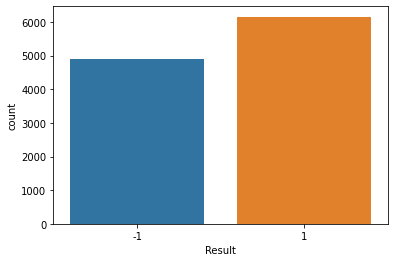

In [ ]:
print(data['Result'].value_counts())
sns.countplot('Result',data=data)

In [ ]:
data.drop('Id', axis = 1, inplace = True)

In [ ]:
col=data.columns
for i in col:
        print(i,data[i].unique())

Having_Ip_Address [-1  1]
Url_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
Having_At_Symbol [ 1 -1]
Double_Slash_Redirecting [-1  1]
Prefix_Suffix [-1  1]
Having_Sub_Domain [-1  0  1]
Sslfinal_State [-1  1  0]
Domain_Registeration_Length [-1  1]
Favicon [ 1 -1]
Port [ 1 -1]
Https_Token [-1  1]
Request_Url [ 1 -1]
Url_Of_Anchor [-1  0  1]
Links_In_Tags [ 1 -1  0]
Sfh [-1  1  0]
Submitting_To_Email [-1  1]
Abnormal_Url [-1  1]
Redirect [0 1]
On_Mouseover [ 1 -1]
Rightclick [ 1 -1]
Popupwidnow [ 1 -1]
Iframe [ 1 -1]
Age_Of_Domain [-1  1]
Dnsrecord [-1  1]
Web_Traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_Pointing_To_Page [ 1  0 -1]
Statistical_Report [-1  1]
Result [-1  1]


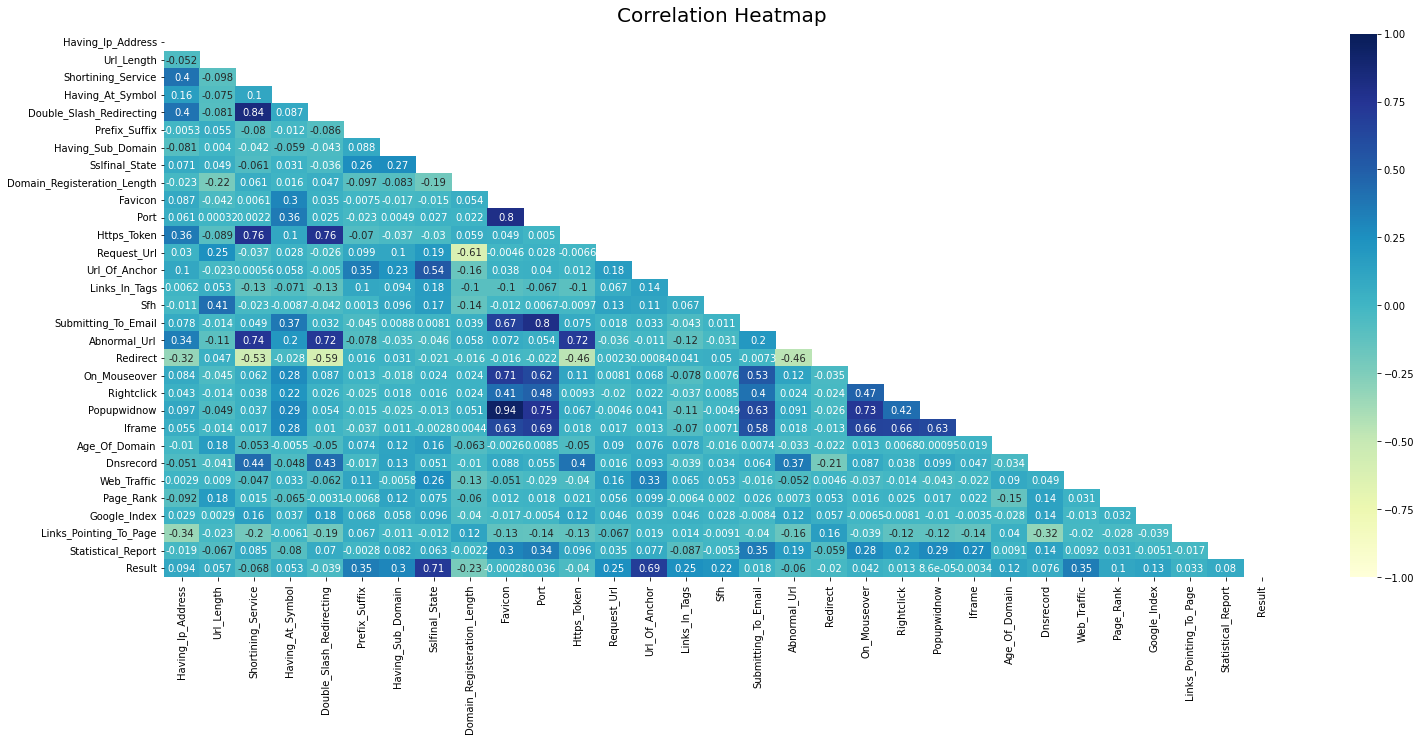

In [ ]:
plt.figure(figsize=(25, 10))
corr = data.corr()
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

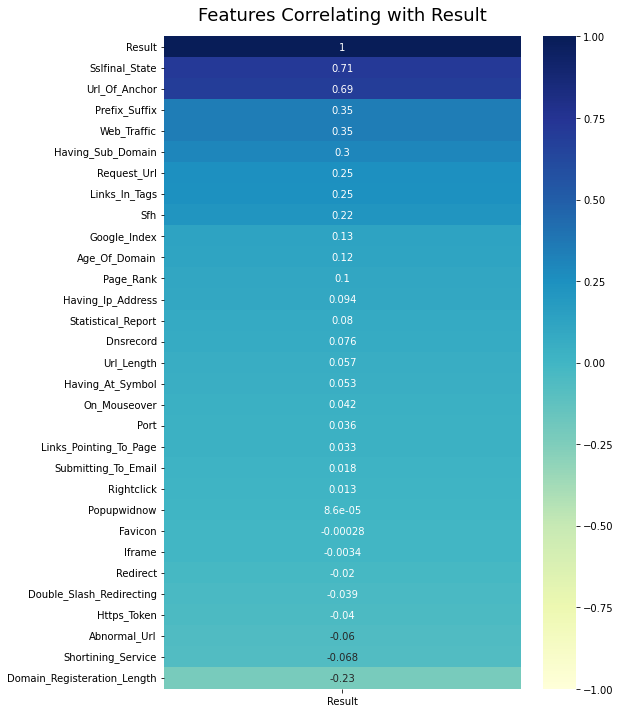

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'YlGnBu')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [ ]:
data.drop(['Popupwidnow', 'Favicon','Iframe'], axis = 1, inplace = True)

In [ ]:
data.head()

,Having_Ip_Address,Url_Length,Shortining_Service,Having_At_Symbol,Double_Slash_Redirecting,Prefix_Suffix,Having_Sub_Domain,Sslfinal_State,Domain_Registeration_Length,Port,...,On_Mouseover,Rightclick,Age_Of_Domain,Dnsrecord,Web_Traffic,Page_Rank,Google_Index,Links_Pointing_To_Page,Statistical_Report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data['Result'] = np.where(data['Result']==-1, 0, data['Result'])
Y = data['Result']
X = data.drop(columns=['Result'])

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=93102106)

In [ ]:
lr=LogisticRegression()
lr.fit(train_X,train_Y)
pred=lr.predict(test_X)
print(accuracy_score(pred,test_Y))
print(confusion_matrix(test_Y, pred))

0.9276454627675611
[[1328  143]
 [  97 1749]]


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
model= knn.fit(train_X,train_Y)

knn_predict=model.predict(test_X)
print(accuracy_score(knn_predict,test_Y))
print(confusion_matrix(test_Y, knn_predict))

0.9436237564063913
[[1370  101]
 [  86 1760]]


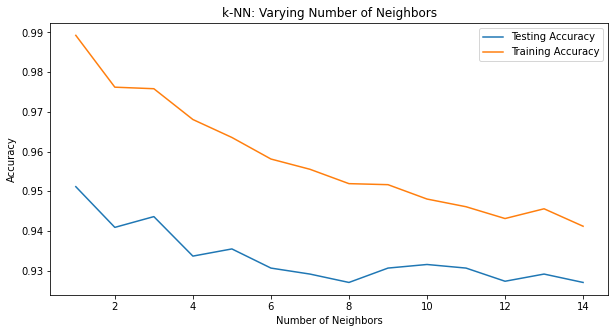

In [ ]:
neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k )

    knn.fit(train_X, train_Y)
    
    train_accuracy[i] = knn.score(train_X, train_Y)

    test_accuracy[i] = knn.score(test_X, test_Y)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)

print(accuracy_score(naive_predict,test_Y))
print(confusion_matrix(test_Y, naive_predict))

0.9071450105517034
[[1308  163]
 [ 145 1701]]


In [ ]:
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
print('Parameters currently in use:\n\n')

pprint(forest_clf.get_params())
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
print(accuracy_score(ran_pred,test_Y))
print(confusion_matrix(test_Y, ran_pred))

Parameters currently in use:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
0.9514621646065722
[[1357  114]
 [  47 1799]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_X,train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
forest_clf = RandomForestClassifier(bootstrap=False,max_depth=40,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1400)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
print(confusion_matrix(test_Y, ran_pred))
print(accuracy_score(ran_pred,test_Y))

[[1401   70]
 [  37 1809]]
0.967741935483871


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(train_X,train_Y) 

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
svm_clf =SVC(C=100, gamma=0.1, kernel='rbf')
svm_clf.fit(train_X,train_Y)
pred=svm_clf.predict(test_X)
print(confusion_matrix(test_Y, pred))
print(accuracy_score(pred,test_Y))


[[1376   95]
 [  42 1804]]
0.9586976183298161
